In [213]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [214]:
df = pd.read_csv (r"C:\Users\dell\Documents\Data analysis\OASIS INFOBYTE\Customer segmentation analysis\ifood_df.csv")

In [215]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [217]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [218]:
df['Total purchases'] =df['NumDealsPurchases'] + df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebPurchases']

In [219]:
df['Physical preference'] = round((df['NumDealsPurchases'] + df['NumCatalogPurchases']+df['NumStorePurchases'])/df['Total purchases'],2)

In [220]:
df['Physical preference']

0       0.68
1       0.83
2       0.62
3       0.75
4       0.74
        ... 
2200    0.50
2201    0.64
2202    0.89
2203    0.74
2204    0.73
Name: Physical preference, Length: 2205, dtype: float64

In [221]:
df['Online preference']= round((df['NumWebPurchases']+df['NumWebVisitsMonth']/df['Total purchases']),2)

In [222]:
df['Online preference']

0       8.28
1       1.83
2       8.19
3       2.75
4       5.26
        ... 
2200    9.28
2201    8.32
2202    2.32
2203    6.13
2204    3.64
Name: Online preference, Length: 2205, dtype: float64

In [223]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total purchases,Physical preference,Online preference
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,25,0.68,8.28
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,6,0.83,1.83
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,21,0.62,8.19
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,8,0.75,2.75
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,19,0.74,5.26


In [224]:
f_df = df[['Income','MntTotal','Age', 'AcceptedCmpOverall','MntRegularProds','Physical preference','Online preference','Total purchases']]

In [225]:
f_df

,Income,MntTotal,Age,AcceptedCmpOverall,MntRegularProds,Physical preference,Online preference,Total purchases
0,58138.0,1529,63,0,1441,0.68,8.28,25
1,46344.0,21,66,0,15,0.83,1.83,6
2,71613.0,734,55,0,692,0.62,8.19,21
3,26646.0,48,36,0,43,0.75,2.75,8
4,58293.0,407,39,0,392,0.74,5.26,19
...,...,...,...,...,...,...,...,...
2200,61223.0,1094,53,0,847,0.50,9.28,18
2201,64014.0,436,74,1,428,0.64,8.32,22
2202,56981.0,1217,39,1,1193,0.89,2.32,19
2203,69245.0,782,64,0,721,0.74,6.13,23


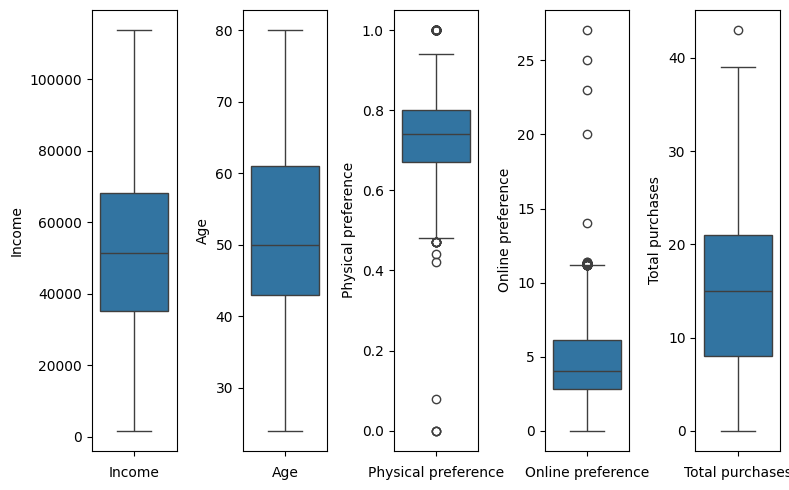

In [226]:
plt.figure(figsize = (8,5))
plt.subplot(1,5,1)
sea.boxplot(data = f_df['Income'])
plt.xlabel('Income')

plt.subplot(1,5,2)
sea.boxplot(data = f_df['Age'])
plt.xlabel('Age')

plt.subplot(1,5,3)
sea.boxplot(data = f_df['Physical preference'])
plt.xlabel('Physical preference')

plt.subplot(1,5,4)
sea.boxplot(data = f_df['Online preference'])
plt.xlabel('Online preference')

plt.subplot(1,5,5)
sea.boxplot(data = f_df['Total purchases'])
plt.xlabel('Total purchases')

plt.tight_layout()
plt.show()

In [227]:
f_df[f_df['Total purchases']>40]

,Income,MntTotal,Age,AcceptedCmpOverall,MntRegularProds,Physical preference,Online preference,Total purchases
20,2447.0,1729,41,0,1728,1.0,0.02,43


In [228]:
f_df.isnull().sum()
f_df = f_df.dropna()


In [229]:
f_df.isnull().sum()

Income                 0
MntTotal               0
Age                    0
AcceptedCmpOverall     0
MntRegularProds        0
Physical preference    0
Online preference      0
Total purchases        0
dtype: int64

In [230]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(f_df[['Income', 'MntTotal','Age','AcceptedCmpOverall','MntRegularProds','Physical preference','Online preference',	'Total purchases']])

In [231]:
scaled_df

array([[ 0.3131764 ,  1.67713106,  1.01677379, ..., -0.53470417,
         1.43271091,  1.32809108],
       [-0.25745483, -0.94173491,  1.27301241, ...,  1.00015504,
        -1.12988351, -1.17066868],
       [ 0.96513975,  0.29649549,  0.33347079, ..., -1.14864785,
         1.39695378,  0.8020364 ],
       ...,
       [ 0.25719706,  1.13529672, -1.03313522, ...,  1.61409872,
        -0.9352058 ,  0.53900905],
       [ 0.85056838,  0.37985462,  1.10218666, ...,  0.07923952,
         0.57851277,  1.06506374],
       [ 0.05824542, -0.7159706 ,  1.27301241, ..., -0.02308443,
        -0.41076787, -0.51310032]], shape=(2203, 8))

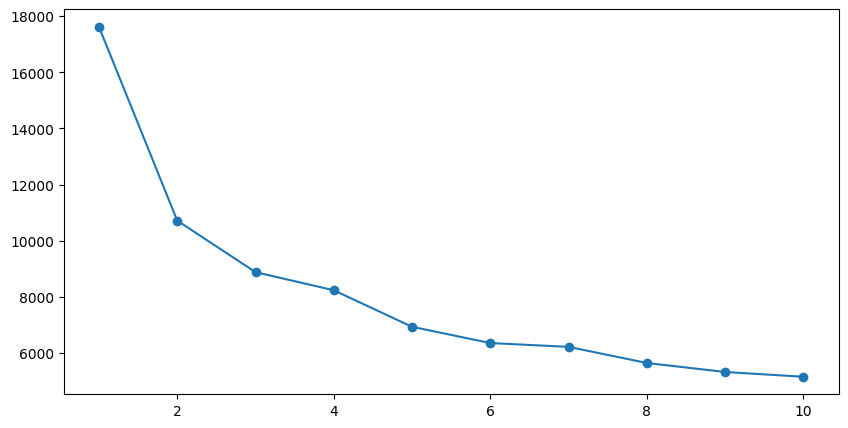

In [232]:
max_k = 12
inertia = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values :
    kmeans = KMeans(n_clusters = k , random_state = 42 , max_iter = 1000)
    kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)
    
    
plt.figure(figsize = (10,5))
plt.plot (k_values , inertia, marker = 'o')
plt.show()
    

In [233]:
max_k = 4
inertia = []
k_values = [1,2,3,4]
for k in k_values :
    kmeans = KMeans(n_clusters = k , random_state = 42 , max_iter = 1000)
    cluster_label = kmeans.fit_predict(scaled_df)
    

In [234]:
f_df['Cluster'] = cluster_label

C:\Users\dell\AppData\Local\Temp\ipykernel_7944\3458870511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['Cluster'] = cluster_label


In [235]:
f_df

,Income,MntTotal,Age,AcceptedCmpOverall,MntRegularProds,Physical preference,Online preference,Total purchases,Cluster
0,58138.0,1529,63,0,1441,0.68,8.28,25,2
1,46344.0,21,66,0,15,0.83,1.83,6,1
2,71613.0,734,55,0,692,0.62,8.19,21,2
3,26646.0,48,36,0,43,0.75,2.75,8,3
4,58293.0,407,39,0,392,0.74,5.26,19,2
...,...,...,...,...,...,...,...,...,...
2200,61223.0,1094,53,0,847,0.50,9.28,18,2
2201,64014.0,436,74,1,428,0.64,8.32,22,2
2202,56981.0,1217,39,1,1193,0.89,2.32,19,0
2203,69245.0,782,64,0,721,0.74,6.13,23,2


In [236]:
total_sum_c = f_df.groupby('Cluster')['Total purchases'].sum()

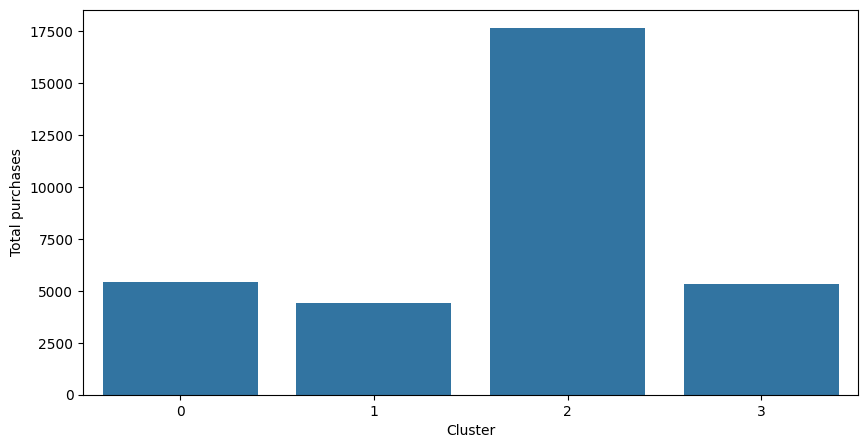

In [247]:
total_sum_c = pd.DataFrame(total_sum_c)
plt.figure(figsize=(10,5))
sea.barplot(x = 'Cluster', y = 'Total purchases', data = total_sum_c)

plt.show()